##k means clustering 
K-Means Clustering is an unsupervised machine learning algorithm used to group similar data points into K number of clusters.

🔧 How it works (Step-by-step):
Choose K: Decide how many clusters (K) you want.

Initialize Centroids: Randomly select K points as the initial cluster centers (called centroids).

Assign Points: Assign each data point to the nearest centroid (using Euclidean distance).

Update Centroids: Recalculate the centroid of each cluster as the mean of all points assigned to it.

Repeat: Repeat steps 3 and 4 until the centroids no longer move (convergence).



💡 Why Elbow Method?
Choosing the right number of clusters (K) is tricky. If you pick too few, you miss patterns; too many, and it overfits.
Elbow Method helps you find a balance by plotting Within-Cluster-Sum-of-Squares (WCSS) for different K values.

🧮 What is WCSS?
WCSS measures the total distance between each point and its assigned cluster centroid. Lower WCSS means tighter, better clusters.

In [3]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

X, _ = make_blobs(n_samples=300, centers=5, cluster_std=0.60, random_state=0)


In [4]:
wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=43)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # inertia_ is the WCSS


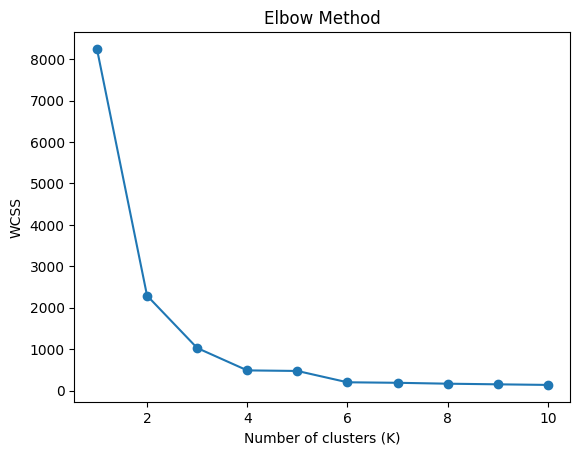

In [5]:
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS')
plt.show()


In [16]:
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=43)
y_kmeans = kmeans.fit_predict(X)


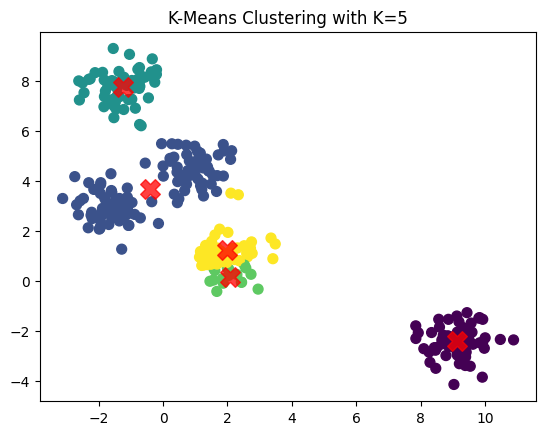

In [17]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='ver')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X')
plt.title(f'K-Means Clustering with K={optimal_k}')
plt.show()
